In [270]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing_data = fetch_california_housing()

# Access the data
X = housing_data.data  # Features
y = housing_data.target  # Target variable

In [271]:
print(housing_data.DESCR)  # Print dataset description
print(X.shape)  # Print shape of feature matrix
print(y.shape)  # Print shape of target variable

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [272]:
dir(housing_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [273]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [274]:
X.shape

(20640, 8)

In [275]:
y.shape

(20640,)

In [276]:
import pandas as pd
df_features = pd.DataFrame(X, columns=housing_data.feature_names)
df_prices = pd.DataFrame(y, columns=['Price'])
df = pd.concat([df_features,df_prices],axis=1)
df.head(10)
df.to_csv('california_housing.csv')

In [277]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [278]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [279]:
(df.isna().sum(axis=0)).sum()

np.int64(0)

In [280]:
(df.isnull().sum(axis=0)).sum()

np.int64(0)

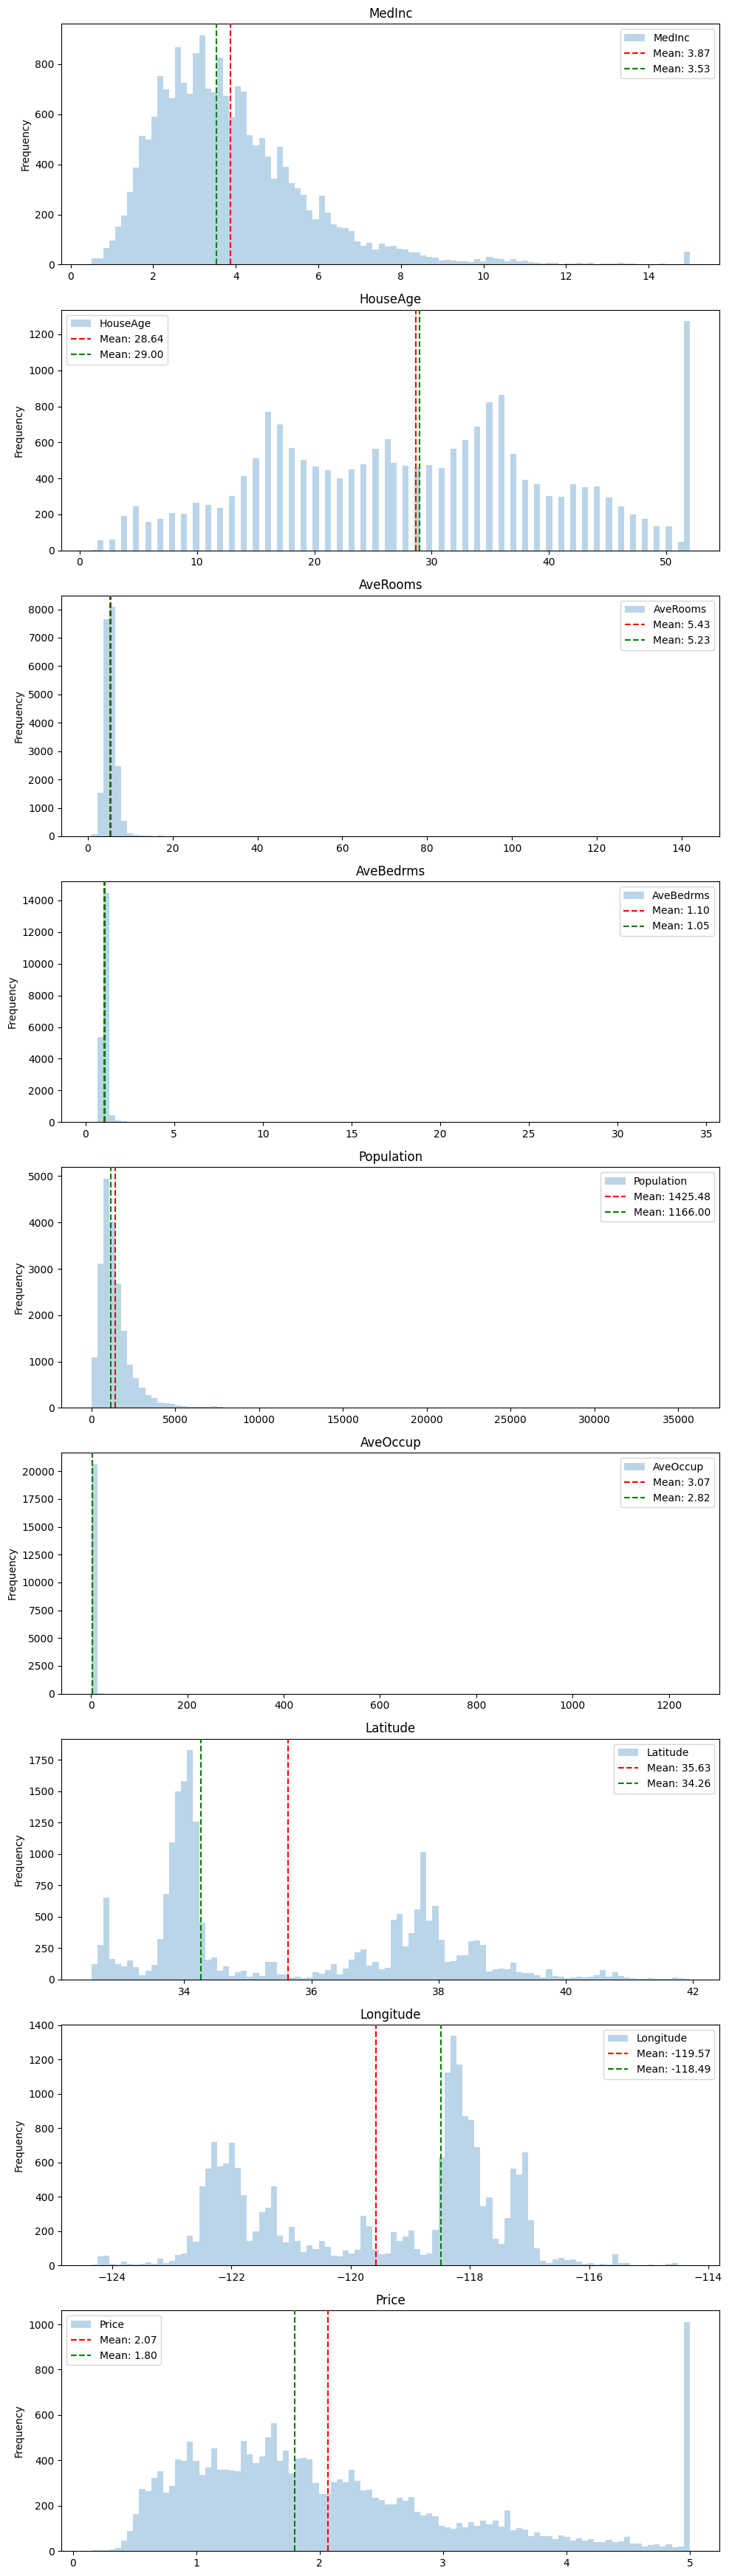

In [281]:
# Create histograms
import matplotlib.pyplot as plt
def gen_histogram(df,save=True, figsize=(10,35),filename='histogram.pdf'):
    fig, axes = plt.subplots(nrows=len(df.columns),ncols=1,figsize=figsize)
    # Plot each column
    for i, col in enumerate(df.columns):
        df[col].plot(kind='hist', ax=axes[i], title=col, alpha=0.3,label=col, bins=100,range=(df[col].min(), df[col].max()))
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}',zorder=15)
        axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Mean: {df[col].median():.2f}',zorder=15)
        axes[i].legend()
    plt.tight_layout()
    if save ==True:
        plt.savefig(filename)
    else:
        pass
    plt.show()
    return None
gen_histogram(df)

In [307]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,BayesianRidge, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Load the dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Preprocess data (e.g., scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models and evaluate
models = [LinearRegression(), 
          RandomForestRegressor(),
          Lasso(),
          Ridge(),
          BayesianRidge(),
          ElasticNet()]
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse:.4f} and r2: {r2:4f}")

Model: LinearRegression, MSE: 0.5368 and r2: 0.590402
Model: RandomForestRegressor, MSE: 0.2550 and r2: 0.805446
Model: Lasso, MSE: 1.3105 and r2: -0.000001
Model: Ridge, MSE: 0.5368 and r2: 0.590407
Model: BayesianRidge, MSE: 0.5368 and r2: 0.590410
Model: ElasticNet, MSE: 1.0382 and r2: 0.207799
